# w3Quiz. Correlation coefficients 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

___
Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

In [3]:
waterdf = pd.read_csv('data/water2.txt', sep='\t')
waterdf.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


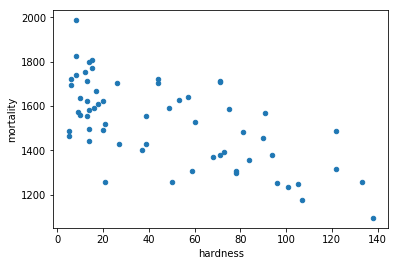

In [13]:
waterdf.plot('hardness', 'mortality', kind='scatter');

In [15]:
waterdf.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
waterdf.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


___
Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [16]:
waterdf_n = waterdf[waterdf['location'] == 'North']
waterdf_s = waterdf[waterdf['location'] == 'South']

In [21]:
print('North\n', waterdf_n.corr())
print('South\n', waterdf_s.corr())

North
            mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000
South
            mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000


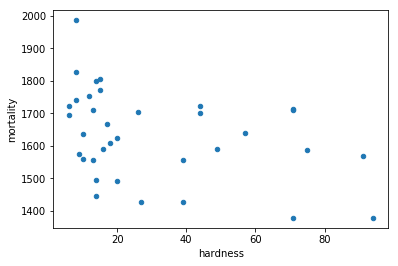

In [22]:
waterdf_n.plot('hardness', 'mortality', kind='scatter');

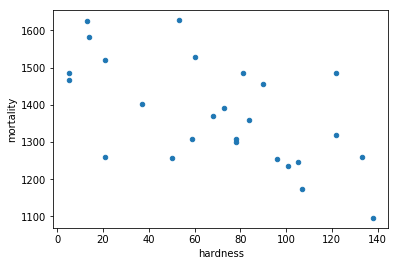

In [24]:
waterdf_s.plot('hardness', 'mortality', kind='scatter');

Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

X1\X2 | m | f
------|---|--
1tm   |239|203
<1tm  |515|718

In [26]:
def MCC(a,b,c,d):
    mcc = (a*d-b*c) / np.sqrt((a+b)*(a+c)*(b+d)*(c+d))
    return mcc
print(MCC(239, 203, 515, 718))
print(MCC(203,239, 718, 515))

0.10900237458678963
-0.10900237458678963


In [33]:
obs = np.array([[239, 203], [515, 718]])
sts.chi2_contingency(obs)

(19.40753078854304,
 1.0558987006638725e-05,
 1,
 array([[198.96597015, 243.03402985],
        [555.03402985, 677.96597015]]))

___
В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [34]:
import proportions_hypotheses

In [35]:
M_prop = np.array([1]*239 + [0]*515)
F_prop = np.array([1]*203 + [0]*718)

In [36]:
proportions_hypotheses.proportions_diff_confint_ind(M_prop, F_prop)

(0.053905233215813156, 0.13922183141523897)

In [41]:
proportions_hypotheses.proportions_diff_z_test(
    proportions_hypotheses.proportions_diff_z_stat_ind(M_prop, F_prop))

8.153453089576601e-06

In [39]:
import statsmodels.stats.weightstats as wsts
import statsmodels.stats.proportion as propsts

In [38]:
wsts.zconfint(M_prop, F_prop)

(0.05436650890323453, 0.1387605557278176)

In [44]:
propsts.proportions_ztest(
    [M_prop.mean(), F_prop.mean()], [len(M_prop), len(F_prop)])

(0.20587181803187005, 0.8368910398419305)

___
Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

Не доволен	Более или менее	Доволен
Не очень счастлив	197	111	33
Достаточно счастлив	382	685	331
Очень счастлив	110	342	333
Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [45]:
obs_money = np.array([
    [197, 111, 33],
    [382, 685, 331],
    [110, 342, 333]
])

In [70]:
sts.chi2_contingency(obs_money)[0]

293.68311039689746

In [72]:
obs_money.sum()

2524

In [69]:
V_Cramer = np.sqrt(
    (sts.chi2_contingency(obs_money)[0]) / 
    (obs_money.sum()*(3-1))
)
print(V_Cramer)

0.2412013934500338


In [2]:
b = sts.binom(10, 0.5)

In [3]:
x = np.linspace(0,10, 11)

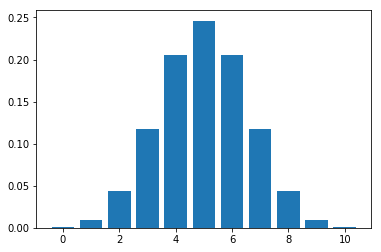

In [4]:
plt.bar(x, b.pmf(x));

In [7]:
b.cdf(9)

0.9990234375

In [86]:
sts.binom_test(9, 10, .5, alternative='greater')

0.010742187499999998

In [9]:
sts.binom.sf(8, 10, .5)

0.010742187499999998